In [1]:
from giagrad.tensor import Tensor
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from numpy.typing import NDArray
from tqdm import tqdm
import numpy as np

# Linear regression

In [2]:
class Neuron:
    def __init__(self):
        self.w = Tensor.uniform(1,1, requires_grad=True)
        self.b = Tensor.uniform(1,1, requires_grad=True)
        self.parameters = [self.w, self.b]
        
    def __call__(self, x: NDArray):
        return self.w * x + self.b
    
    def zero_grad(self):
        for p in self.parameters:
            p.grad = np.zeros_like(p.grad)

## Data

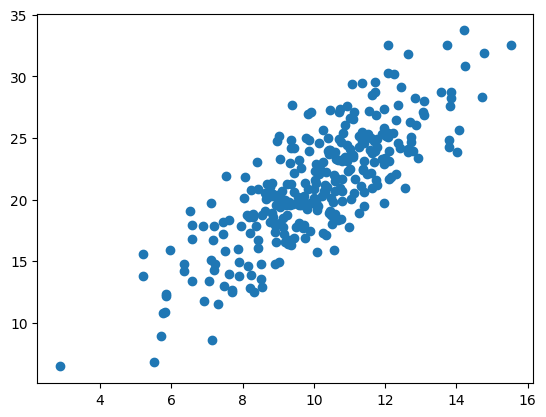

In [3]:
np.random.seed(1234)
n = 300
X = np.random.normal(10, 2, n)
b = 1
y = 2 * X + b + np.random.normal(0, 3, n)

plt.scatter(X, y)
plt.show()

In [4]:
model = Neuron()

for k in (prog_bar := tqdm(range(200))):
    # forward
    y_hat = [model(x) for x in X]
    loss = sum([(y_h - y_obs)**2 for y_h, y_obs in zip(y_hat, y)])
    total_loss = loss * (1/n)
    
    # backward
    total_loss.backward()
    
    # update gradient (sgd)
    learning_rate = 0.001
    for param in model.parameters:
        param.data -= learning_rate * param.grad
    
    model.zero_grad() # reset grad
    prog_bar.set_description(f"It: {k}, loss: {total_loss}")
        

It: 199, loss: [[8.024955]]: 100%|████████████████████████████████████| 200/200 [00:02<00:00, 99.19it/s]


## Check performance

In [5]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression().fit(X.reshape((-1,1)), y)
print(f"intercept: {sk_model.intercept_}")
print(f"slope: {sk_model.coef_}")
print()
print(f"Tensor intercept: {model.b.data}")
print(f"Tensor slope: {model.w.data}")

intercept: 1.734157209071288
slope: [1.92941974]

Tensor intercept: [[-0.14680874]]
Tensor slope: [[2.1091714]]


## Plot

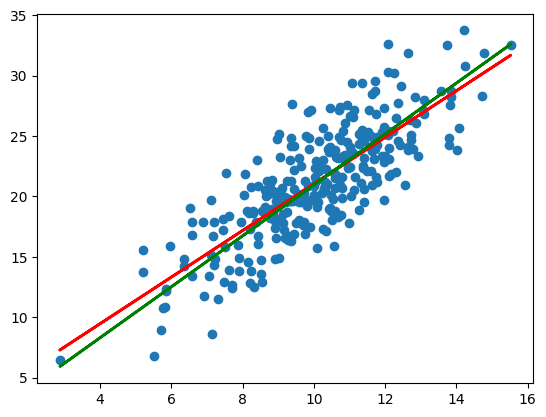

In [6]:
plt.scatter(X, y)
plt.plot(X, sk_model.coef_*X+sk_model.intercept_, color='red', linewidth=2)
plt.plot(X, model.w.data[0]*X+model.b.data[0], color='green',  linewidth=2)
plt.show()